# Class 7: Data Visualization with Matplotlib
## Objective: Learn the basics of professional data visualization

**Instructions:** Work with one or more students at your table. Discuss the key concepts and the code logic with one another. 

## Section 1: Figure and Axes Model

In Matplotlib, the **Figure** is the overall canvas, and the **Axes** (ax) is the specific plot area where data appears. Using `fig, ax = plt.subplots()` is the preferred "Object-Oriented" way to plot because it explicitly creates these objects. While `plt.plot()` (the state-machine interface) is simpler for quick sketches, `ax.plot()` allows for much finer control, especially when working with a grid of subplots created via `plt.subplots(rows, cols)`.

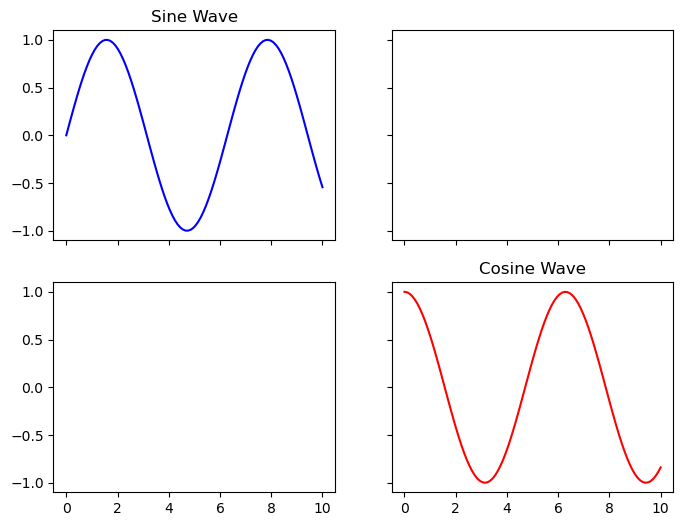

In [3]:
# Code Example: Creating a grid
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x2 grid of plots
# sharex/sharey=True ensures all plots use the same scale/labels
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

# Accessing specific subplots using indices [row, col]
x = np.linspace(0, 10, 100)
axes[0, 0].plot(x, np.sin(x), color='blue')
axes[0, 0].set_title("Sine Wave")

axes[1, 1].plot(x, np.cos(x), color='red')
axes[1, 1].set_title("Cosine Wave")

plt.show() # Necessary to display the plot in many environments

**Test your understanding:** Create a figure with 1 row and 2 columns. In the first column (index 0), plot a line. In the second column (index 1), plot a different line. Use `sharey=True` so the two plots can be easily compared.

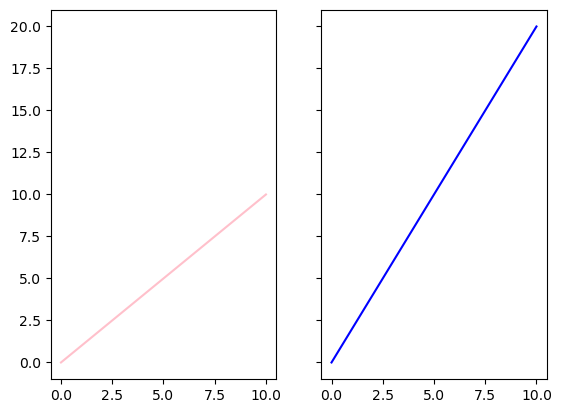

In [11]:
# Create a 1x2 grid here
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

# Plot on axes[0] and axes[1]
x = np.linspace(0, 10, 100)
axes[0].plot(x, x, color='pink')
#axes[0].set_title("First Plot")

axes[1].plot(x, x*2, color='blue')
#axes[1].set_title("Second Plot")


## Section 2: Understanding Parameters

Plots are customized using parameters. For scatter plots, `s` controls size and `c` controls color. In histograms, `bins` determines the number of intervals. `alpha` (0 to 1) sets transparency, which is vital for seeing overlapping data points. Colormaps (`cmap`) map numerical values to colors; `'viridis'` is the modern standard because it is perceptually uniform.

Text(0.5, 1.0, 'Histogram: bins')

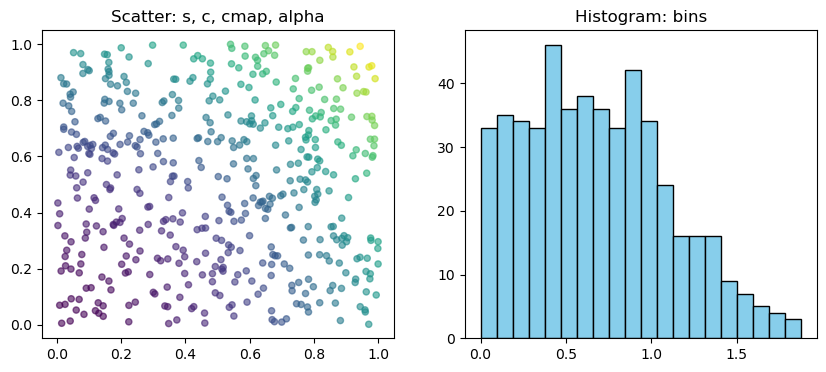

In [17]:
# Code Example: Scatter and Histograms
# Generate random "stellar" data
x = np.random.rand(500)
y = np.random.rand(500)
colors = x**2 + y**2 # Use distance from origin for color

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# s=size, c=color array, cmap=colormap, alpha=transparency
ax[0].scatter(x, y, s=20, c=colors, cmap='viridis', alpha=0.6, marker='o')
ax[0].set_title("Scatter: s, c, cmap, alpha")

# bins=number of bars
ax[1].hist(colors, bins=20, color='skyblue', edgecolor='black')
ax[1].set_title("Histogram: bins")

**Test your understanding:** Modify the scatter plot code below to use square markers (`'s'`), a transparency (`alpha`) of 0.3, and a color of your choice.

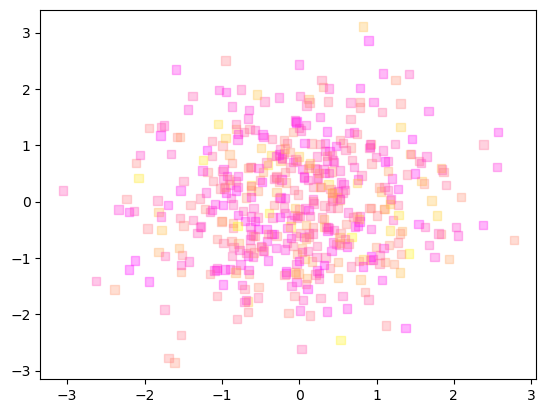

In [28]:
x = np.random.randn(500)
y = np.random.randn(500)

fig, ax = plt.subplots()
# Change markers to squares and alpha to 0.3
ax.scatter(x, y, marker='s', c=colors, cmap='spring', alpha=0.3)

## Section 3: Common Code Patterns

Professional plots require clear labels and high-quality exports. Use raw strings (`r''`) for labels containing LaTeX math (like $T_{eff}$). `plt.legend()` automatically looks for `label` tags in your plot calls. `plt.tight_layout()` is a "magic" command that fixes overlapping text, and `plt.savefig()` handles file exports where `dpi` sets resolution and `bbox_inches='tight'` prevents labels from being cut off. The `fontsize` parameter is valuable to make text more readable. 

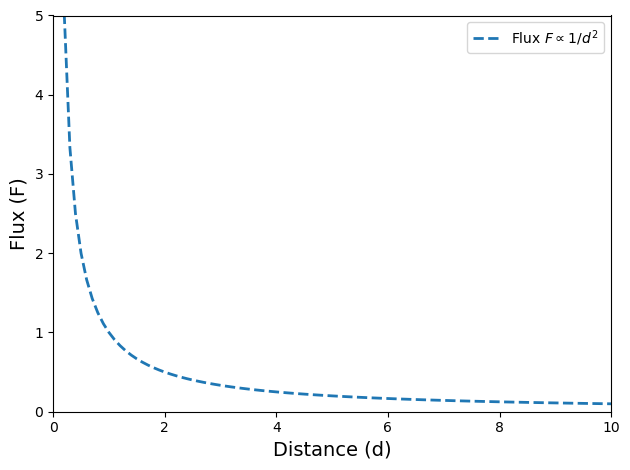

In [26]:
# Code Example: Labels and Saving

x = np.linspace(0.1, 10, 100)
y = 1/x

fig, ax = plt.subplots()
ax.plot(x, y, label=r'Flux $F \propto 1/d^2$', linewidth=2, linestyle='--')

# Setting ranges and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.set_xlabel('Distance (d)', fontsize=14)
ax.set_ylabel('Flux (F)', fontsize=14)
ax.legend()

plt.tight_layout() # Fixes layout issues
# plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')

**Test your understanding:** Plot the function $y=x^2$. Add a label to the plot that uses LaTeX math for "x squared", and then call the command that ensures the legend actually appears.

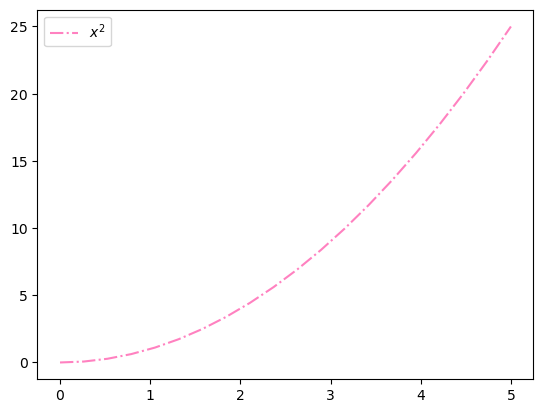

In [33]:
x = np.linspace(0, 5, 20)
y = x**2

fig, ax = plt.subplots()
# Add your plot with a label and show the legend
ax.plot(x, y, label=r'$x^2$', linestyle='dashdot', color='xkcd:pink')
ax.legend()

## Section 4: Method Calls and Returns

Many Matplotlib functions return objects. `plt.subplots()` returns the Figure and the Axes. `ax.twinx()` creates a second y-axis that shares the same x-axis—useful for plotting two different units (like Magnitude and Flux) on one chart. `plt.colorbar()` adds a color scale linked to an image or scatter plot.

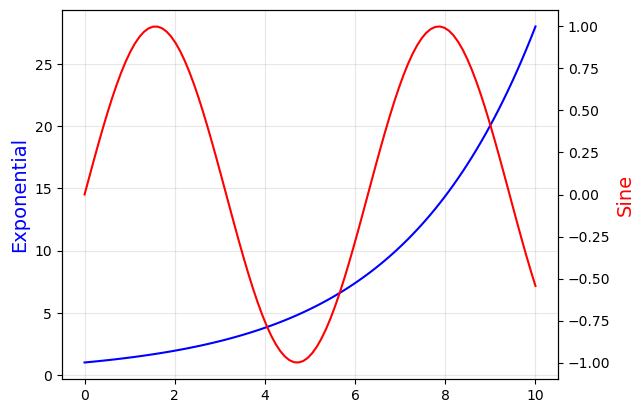

In [34]:
# Code Example: Colorbars and Twin Axes
x = np.linspace(0, 10, 100)
y1 = np.exp(x/3)
y2 = np.sin(x)

fig, ax1 = plt.subplots()

ax1.plot(x, y1, color='blue')
ax1.set_ylabel('Exponential', color='blue', fontsize=14)

# Create a twin axis for the sine wave
ax2 = ax1.twinx()
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Sine', color='red', fontsize=14)

ax1.grid(True, alpha=0.3) # Add a subtle grid

**Test your understanding:** Create a plot of random data using imshow and then add a colorbar to the side of the image.

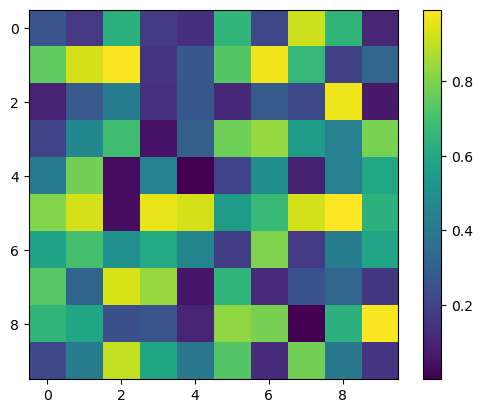

In [39]:
data = np.random.rand(10, 10)

fig, ax = plt.subplots()
img = ax.imshow(data)
# Add a colorbar here
plt.colorbar(img)

## Section 5: Data Transformation

Visualizing 2D functions requires transforming 1D arrays. `np.meshgrid` takes two 1D coordinate arrays and creates the 2D grids needed for functions like `plt.contour` or `plt.pcolormesh`. `imshow` treats an array directly as an image, mapping values to colors based on the data's shape.

Text(0.5, 1.0, 'Contour Plot using meshgrid')

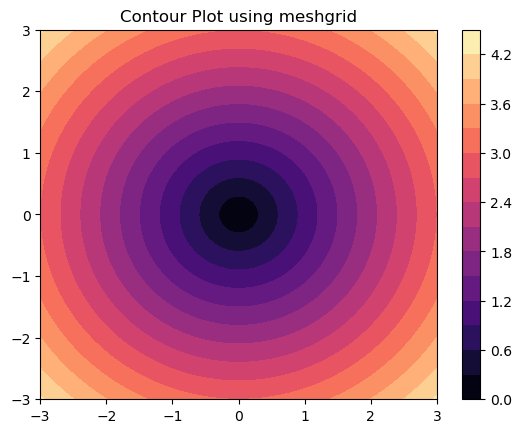

In [40]:
# Code Example: 2D Surfaces
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y) # Transform 1D to 2D
Z = np.sqrt(X**2 + Y**2)

fig, ax = plt.subplots()
cp = ax.contourf(X, Y, Z, levels=15, cmap='magma')
fig.colorbar(cp)
ax.set_title("Contour Plot using meshgrid")

**Test your understanding:** Use `np.meshgrid` to create a grid from `x = np.arange(5)` and `y = np.arange(5)`. Print the shape of the resulting X grid.

In [49]:
x = np.arange(5)
y = np.arange(5)
# Use meshgrid and print shape
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
#xg = ax.plot(X, Y)
print(X.shape)
X

(5, 5)


array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

## Section 6: Global Settings and Context

`mpl.rcParams` is a global dictionary that controls default settings like font size, line width, and tick directions. Changing a value here affects all subsequent plots in the notebook. If you only want to change settings for one specific plot, use with `mpl.rc_context()` to apply temporary settings.

In [ ]:
# Code Example: Global vs. Temporary

import matplotlib as mpl

# Permanent change for the whole notebook
mpl.rcParams['font.size'] = 14
mpl.rcParams['lines.linewidth'] = 3

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9])
ax.set_title("Global Font Size is 14")

# Temporary change for just one block
with mpl.rc_context({'font.size': 8, 'axes.edgecolor': 'red'}):
    fig2, ax2 = plt.subplots()
    ax2.plot([1, 2, 3], [9, 4, 1])
    ax2.set_title("Temporary Font Size is 8")

**Test your understanding:** Use `mpl.rcParams` to set the default figure `dpi` to 150. Then create a small plot to verify it looks sharper.

In [ ]:
# Set global DPI to 150
